In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:

X_test.shape


(10000, 28, 28)

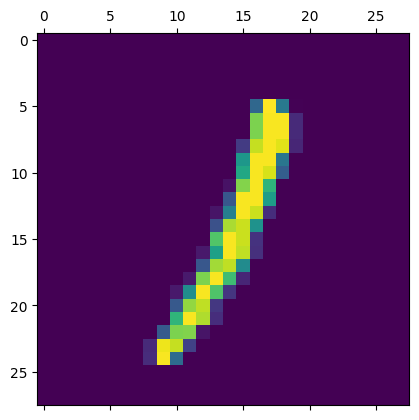

In [9]:
plt.matshow(X_train[99])

In [10]:

y_train[99]

1

In [11]:

X_train = X_train / 255
X_test = X_test / 255

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2724 - accuracy: 0.9219
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1222 - accuracy: 0.9642
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0284 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9794


[0.07813669741153717, 0.9793999791145325]

In [14]:

X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [15]:

X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [19]:
import numpy as np
from PIL import Image

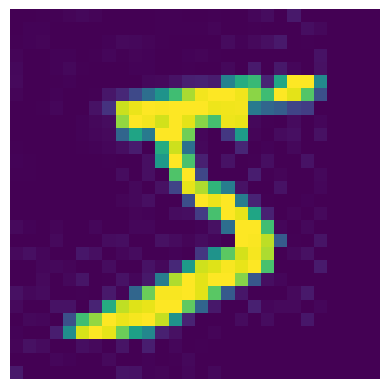

In [20]:
image = Image.open('/content/example_image.jpg').convert('L')  # Convert to grayscale if needed
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.show()

# Preprocess the image
image = image / 255.0  # Scale pixel values to range [0, 1]
image = image.reshape(1, 28, 28)  # Reshape to match model input shape

In [25]:
predictions = model.predict(image)


1/1 [==============================] - 0s 215ms/step


In [26]:
predicted_digit = np.argmax(predictions)
print("Predicted Digit:", predicted_digit)

Predicted Digit: 5


In [22]:
model.save('mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from IPython.display import FileLink
FileLink('mnist_model.h5')


/content/mnist_model.h5